In [1]:
import skimage
import os
import numpy as np


import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift, ifft
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage import io

In [7]:
image_directory = r'C:\Users\lacho\OneDrive - UW\crystalmaths\Local_data'
image_list = []
for root, dirs, files in os.walk(image_directory):
    if root == image_directory:
        for file in files:
            image_list.append(root+os.sep+file)

print(image_list)

['C:\\Users\\lacho\\OneDrive - UW\\crystalmaths\\Local_data\\Cubic_1.bmp']


In [8]:
def get_image(image_path):
    image = skimage.io.imread(image_path)
#     image2 = skimage.img_as_float(image_path)
    return image

def get_fft(image_array):
    image_fft = np.abs(np.fft.fftshift((np.fft.fft2(image_array))))
    image_fft = np.log(image_fft)
    return image_fft

def crop_image(image_array):
    """
    Obtain an inner square crop, assuming that this eliminates scale bar. 
    Assumption: scale bars aren't present in inner 80% of image.
    """
    x, y= image_array.shape[0], image_array.shape[1]
    
    #Start of 20% of image in x dimension
    percent_crop = 0.2
    x_0 = int(x*(percent_crop))
    x_f = int(x*(1-percent_crop))
    y_0 = int(y*(percent_crop))
    y_f = int(y*(1-percent_crop))
    
    cropped_image = image_array[x_0:x_f,y_0:y_f]
    return cropped_image

def window_image(image_array, window_name):
    filter_options = {"hann":apply_hann(image_array)}
    
    filtered_image = filter_options[window_name]
    
    return filtered_image

def apply_hann(image_array):
    
    return

## Q. Why did cropping the scale bar out not remove the streak? 


A: Axial streaking is the result of discontinuities at border? 

Resources:
https://dsp.stackexchange.com/questions/25927/fourier-transform-artifacts 
**I am interested in trying the periodic plus smoth image decomposition to get rid of artifacts, it has already been applied to TEM images before, see pub: https://www.cambridge.org/core/journals/microscopy-and-microanalysis/article/periodic-artifact-reduction-in-fourier-transforms-of-full-field-atomic-resolution-images/80D0E226F0B4B16627AA0B6B9BD24F24, see demo: https://github.com/jacobkimmel/ps_decomp**

Also consider:
https://dsp.stackexchange.com/questions/26830/python-scipy-fft-on-numpy-hanning-window-smears-peaks

#Code_Inspo:
https://github.com/wonderchang/img-fft/blob/master/img-fft.py



<class 'imageio.core.util.Array'>


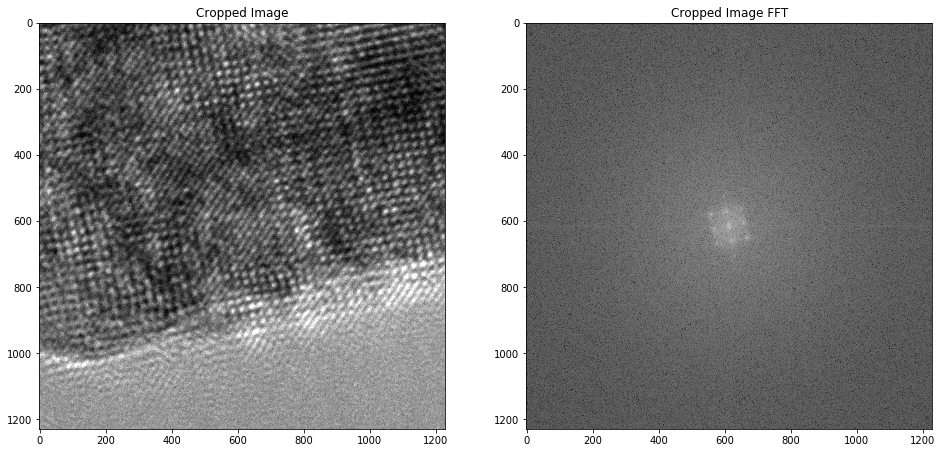

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (16,16))
#No window
for image_filepath in image_list:
    image_array = get_image(image_filepath)
    print(type(image_array))
    image_array = crop_image(image_array)
    image_fft = get_fft(image_array)
    axes[0].imshow(image_array, cmap = 'binary_r')
    axes[0].set_title('Cropped Image')
    axes[1].imshow(image_fft, cmap = 'binary_r')
    axes[1].set_title('Cropped Image FFT')


In [3]:
sys.path.append("..")

import os
import sys
import crysta

imagetools.show_image()

NameError: name 'imagetools' is not defined